<a href="https://colab.research.google.com/github/channacy/PHIL311_FinalProject/blob/main/Copy_of_Twitter_Analysis_Cancel_Culture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim import models

import re
import spacy




In [5]:
tweets = pd.read_csv("cancel_culture_tweets.csv")
#csv file on tweets with mention of trump
tweets.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count
0,byeonghoneyy,2012-12-05 00:49:14+00:00,0,Twitter Web Client,"Nooo, they must not cancel extracurricular. An...",0
1,ecokha,2012-04-03 09:39:02+00:00,0,Twitter for iPhone,@yosra_abdulla @salmanyousif @3askar @majanahi...,0
2,ShackleyGoldman,2013-12-29 22:14:16+00:00,0,twitterfeed,Middleman the wrecker sellers hereby reward in...,0
3,NG_DailyNews,2013-10-28 03:23:49+00:00,0,twitterfeed,#NigerianDailyNews Fleetwood Mac bassist John ...,0
4,ClassicCph,2013-10-24 20:42:37+00:00,0,Twitter Web Client,"@Nauris_L They ""cancel"" culture houses here, t...",0


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             5313 non-null   object
 1   Date Created     5313 non-null   object
 2   Number of Likes  5313 non-null   int64 
 3   Source of Tweet  5313 non-null   object
 4   Tweet            5313 non-null   object
 5   Retweet Count    5313 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 249.2+ KB


In [7]:
tweets['clean_tweets'] = tweets['Tweet'].str.lower()
tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")
tweets.head()

<ipython-input-7-6163b0f575f9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['clean_tweets'] = tweets['clean_tweets'].str.replace("[^\w\s]", "")


,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets
0,byeonghoneyy,2012-12-05 00:49:14+00:00,0,Twitter Web Client,"Nooo, they must not cancel extracurricular. An...",0,nooo they must not cancel extracurricular and ...
1,ecokha,2012-04-03 09:39:02+00:00,0,Twitter for iPhone,@yosra_abdulla @salmanyousif @3askar @majanahi...,0,yosra_abdulla salmanyousif 3askar majanahi kha...
2,ShackleyGoldman,2013-12-29 22:14:16+00:00,0,twitterfeed,Middleman the wrecker sellers hereby reward in...,0,middleman the wrecker sellers hereby reward in...
3,NG_DailyNews,2013-10-28 03:23:49+00:00,0,twitterfeed,#NigerianDailyNews Fleetwood Mac bassist John ...,0,nigeriandailynews fleetwood mac bassist john m...
4,ClassicCph,2013-10-24 20:42:37+00:00,0,Twitter Web Client,"@Nauris_L They ""cancel"" culture houses here, t...",0,nauris_l they cancel culture houses here too l...


In [8]:
stop = ['of', 'thus', 'somehow', 'many', 'until', 'he', 'name', 'whereas', 'namely', 'much', 'still', 'my', 'only', 'towards', 'am', 'below', 'something', 'everywhere', 'been', 'same', 'whereafter', 'none', 'except', 'have', 'yourselves', 'then', 'never', 'full', 'mostly', 'further', 'several', 'bill', 'together', 'can', 'i', 'which', 'might', 'therefore', 'nevertheless', 'thereby', 'formerly', 'were', 'whereupon', 'amoungst', 'thereupon', 'hereupon', 'next', 'during', 'what', 'yourself', 'across', 'was', 'whole', 'up', 'if', 'per', 'myself', 'they', 'wherein', 'she', 'since', 'behind', 'first', 'take', 'fire', 'least', 'mill', 'inc', 'made', 'latter', 'noone', 'four', 'give', 'therein', 'describe', 'others', 'whither', 'besides', 'itself', 'whereby', 'couldnt', 'rather', 'either', 'sixty', 'here', 'will', 'done', 'beyond', 'own', 'against', 'this', 'before', 'amongst', 'on', 'become', 'more', 'front', 'whenever', 'thick', 'nothing', 'again', 'became', 'me', 'thence', 'yet', 'eg', 'sometime', 'ltd', 'always', 'at', 'whence', 'ie', 'six', 'those', 'sincere', 'any', 'latterly', 'nobody', 'why', 'part', 'thru', 'nor', 'in', 'side', 'ours', 'as', 'bottom', 'five', 'third', 'co', 'such', 'himself', 'whoever', 'him', 'thin', 'would', 'these', 'herein', 'upon', 'each', 'you', 'beforehand', 'no', 'his', 'two', 'three', 'the', 'few', 'it', 'yours', 'already', 'interest', 'whom', 'with', 'for', 'other', 'via', 'go', 'onto', 'do', 'get', 'also', 'mine', 'wherever', 'so', 'system', 'us', 'whose', 'after', 'and', 'former', 'all', 'but', 'back', 'too', 'hundred', 'is', 'between', 'even', 'hence', 'whatever', 'hasnt', 'along', 'most', 'herself', 'un', 'has', 'anyone', 'fifty', 'meanwhile', 'being', 'otherwise', 'anywhere', 'serious', 'under', 'seeming', 'by', 'often', 'neither', 'hereby', 'around', 'afterwards', 'an', 'everything', 'who', 'due', 'anyhow', 'than', 'indeed', 'etc', 'to', 'them', 'amount', 'both', 'moreover', 'our', 'de', 'eleven', 'well', 'out', 'or', 'beside', 'because', 'through', 'now', 'your', 'where', 'found', 'had', 'ten', 'almost', 'twenty', 'its', 'once', 'move', 'although', 'nowhere', 'into', 'perhaps', 'con', 'throughout', 'twelve', 'not', 'while', 'detail', 'top', 'we', 'enough', 'from', 'ourselves', 'whether', 'thereafter', 'somewhere', 'please', 'find', 'how', 'fifteen', 'becoming', 'put', 'their', 'nine', 'within', 'one', 'cant', 'are', 'last', 'a', 'seem', 'toward', 'her', 'off', 'show', 'above', 're', 'else', 'cry', 'keep', 'could', 'some', 'see', 'eight', 'anyway', 'hereafter', 'themselves', 'empty', 'elsewhere', 'when', 'ever', 'must', 'seemed', 'very', 'sometimes', 'another', 'becomes', 'may', 'everyone', 'hers', 'fill', 'among', 'should', 'over', 'be', 'anything', 'seems', 'without', 'about', 'that', 'down', 'there', 'though', 'someone', 'alone', 'every', 'call', 'however', 'less', 'forty', 'cannot','the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']
tweets = tweets[tweets['clean_tweets'].notnull()]

tweets['clean_tweets'] = tweets['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [9]:
tweets.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets
0,byeonghoneyy,2012-12-05 00:49:14+00:00,0,Twitter Web Client,"Nooo, they must not cancel extracurricular. An...",0,nooo cancel extracurricular cancel culture fest
1,ecokha,2012-04-03 09:39:02+00:00,0,Twitter for iPhone,@yosra_abdulla @salmanyousif @3askar @majanahi...,0,yosra_abdulla salmanyousif 3askar majanahi kha...
2,ShackleyGoldman,2013-12-29 22:14:16+00:00,0,twitterfeed,Middleman the wrecker sellers hereby reward in...,0,middleman wrecker sellers reward uniformity ca...
3,NG_DailyNews,2013-10-28 03:23:49+00:00,0,twitterfeed,#NigerianDailyNews Fleetwood Mac bassist John ...,0,nigeriandailynews fleetwood mac bassist john m...
4,ClassicCph,2013-10-24 20:42:37+00:00,0,Twitter Web Client,"@Nauris_L They ""cancel"" culture houses here, t...",0,nauris_l cancel culture houses turned riot inf...


Visualize how mentions of "cancel Trump" have changed over time


In [10]:
tweets["contains_cancel_trump"] = tweets["clean_tweets"].str.contains("cancel trump")
cancel_trump_counts = sum(tweets["contains_cancel_trump"])
print(cancel_trump_counts)

1


In [11]:
tweets["Year Created"] = tweets["Date Created"].str[0:4]


In [12]:
yearly_mentions = tweets.groupby("Year Created").sum().reset_index()
yearly_mentions

,Year Created,Number of Likes,Retweet Count,contains_cancel_trump
0,2012,0,0,0
1,2013,1,2,0
2,2014,17,17,0
3,2015,6,10,0
4,2016,8,1,0
5,2017,774,302,0
6,2018,10162,1565,0
7,2019,6722,664,0
8,2020,15008,1889,1
9,2021,10123,1171,0


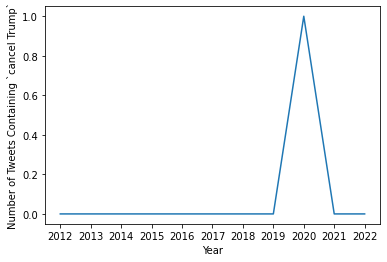

In [13]:
plt.plot(yearly_mentions["Year Created"], yearly_mentions["contains_cancel_trump"])
plt.xlabel("Year")
plt.ylabel("Number of Tweets Containing `cancel Trump`")
plt.show()

Sentiment Analysis

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
tweets["polarity"] = tweets["clean_tweets"].apply(lambda x: sia.polarity_scores(x))

In [17]:
tweets[['neg', 'neu', 'pos', 'compound']] = tweets['polarity'].apply(pd.Series)
tweets.drop('polarity', axis=1)

,User,Date Created,Number of Likes,Source of Tweet,Tweet,Retweet Count,clean_tweets,contains_cancel_trump,Year Created,neg,neu,pos,compound
0,byeonghoneyy,2012-12-05 00:49:14+00:00,0,Twitter Web Client,"Nooo, they must not cancel extracurricular. An...",0,nooo cancel extracurricular cancel culture fest,False,2012,0.500,0.500,0.000,-0.4588
1,ecokha,2012-04-03 09:39:02+00:00,0,Twitter for iPhone,@yosra_abdulla @salmanyousif @3askar @majanahi...,0,yosra_abdulla salmanyousif 3askar majanahi kha...,False,2012,0.167,0.833,0.000,-0.2500
2,ShackleyGoldman,2013-12-29 22:14:16+00:00,0,twitterfeed,Middleman the wrecker sellers hereby reward in...,0,middleman wrecker sellers reward uniformity ca...,False,2013,0.136,0.612,0.252,0.4019
3,NG_DailyNews,2013-10-28 03:23:49+00:00,0,twitterfeed,#NigerianDailyNews Fleetwood Mac bassist John ...,0,nigeriandailynews fleetwood mac bassist john m...,False,2013,0.348,0.652,0.000,-0.7506
4,ClassicCph,2013-10-24 20:42:37+00:00,0,Twitter Web Client,"@Nauris_L They ""cancel"" culture houses here, t...",0,nauris_l cancel culture houses turned riot inf...,False,2013,0.384,0.616,0.000,-0.6808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,doodleepanda,2022-12-31 07:10:03+00:00,0,Twitter for iPhone,I hope people stop bashing him for something h...,0,hope people stop bashing didnt actually say st...,False,2022,0.218,0.683,0.099,-0.3612
5309,Dekatron3,2022-12-31 07:08:15+00:00,4,Twitter for Android,I miss the times when we would just summon ale...,0,miss times just summon aleister im fan cancel ...,False,2022,0.107,0.536,0.357,0.8131
5310,CAntheus,2022-12-31 07:06:32+00:00,2,Twitter for Android,@MarkusTurm Ist das hier right wing cancel cul...,0,markusturm ist das hier right wing cancel cult...,False,2022,0.167,0.833,0.000,-0.2500
5311,RevoltConscious,2022-12-31 07:06:20+00:00,1,Twitter for Android,@Stretford_Bally Some do. Most don't. If he re...,0,stretford_bally dont releases today cancel cul...,False,2022,0.000,0.813,0.187,0.4836


In [18]:
positive = sum(tweets["pos"])
negative = sum(tweets["neg"])
compound = sum(tweets["compound"])
neutral = sum(tweets["neu"])

print("Positive: ", positive)
print("Negative ", negative)
print("Compound", compound)
print("Neutral", neutral)

Positive:  642.0020000000012
Negative  1601.612000000001
Compound -1253.4508999999991
Neutral 3069.4079999999853


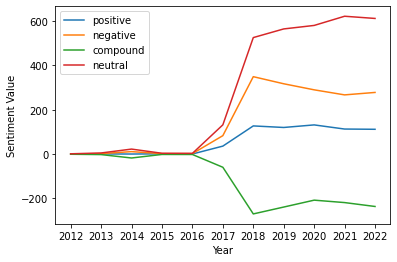

In [19]:
df = tweets.groupby("Year Created").sum().reset_index()

plt.plot(df["Year Created"], df["pos"], label="positive")
plt.plot(df["Year Created"], df["neg"], label = "negative")
plt.plot(df["Year Created"], df["compound"], label = "compound")
plt.plot(df["Year Created"], df["neu"], label = "neutral")
plt.xlabel("Year")
plt.ylabel("Sentiment Value")
plt.legend()
plt.show()


Topic Modelling

Referred to https://www.kaggle.com/code/vedraiyani/topic-modelling

In [20]:
data = tweets["clean_tweets"].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
data[:1]

['nooo cancel extracurricular cancel culture fest']

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['nooo', 'cancel', 'extracurricular', 'cancel', 'culture', 'fest']]


In [22]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['nooo', 'cancel', 'extracurricular', 'cancel', 'culture', 'fest']


In [23]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [25]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [26]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['cancel', 'extracurricular', 'cancel', 'culture', 'f']]


In [27]:
tweets_lemmatized=data_lemmatized


In [28]:
id2word = Dictionary(tweets_lemmatized)
corpus = [id2word.doc2bow(tweet) for tweet in tweets_lemmatized]


In [29]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [30]:
lda_model.print_topics()

[(0,
  '0.043*"good" + 0.039*"bad" + 0.026*"like" + 0.026*"die" + 0.024*"run" + 0.021*"finallevel" + 0.018*"tell" + 0.017*"pick" + 0.017*"promote" + 0.016*"hi"'),
 (1,
  '0.077*"wake" + 0.051*"new" + 0.030*"real" + 0.028*"person" + 0.026*"believe" + 0.026*"end" + 0.018*"practice" + 0.017*"fuck" + 0.015*"truth" + 0.015*"medium"'),
 (2,
  '0.042*"right" + 0.040*"thing" + 0.030*"re" + 0.029*"leave" + 0.023*"work" + 0.021*"today" + 0.020*"try" + 0.018*"come" + 0.018*"cancel" + 0.017*"culture"'),
 (3,
  '0.000*"cancel" + 0.000*"culture" + 0.000*"desperately" + 0.000*"mourn" + 0.000*"underserve" + 0.000*"destroyer" + 0.000*"feralcritter" + 0.000*"smell" + 0.000*"whinge" + 0.000*"alfranken"'),
 (4,
  '0.078*"ve" + 0.043*"lose" + 0.019*"censorship" + 0.018*"child" + 0.017*"woke" + 0.015*"generation" + 0.014*"figure" + 0.014*"fail" + 0.013*"weak" + 0.013*"fake"'),
 (5,
  '0.056*"support" + 0.036*"truly" + 0.034*"proof" + 0.033*"dog" + 0.020*"fine" + 0.017*"decide" + 0.016*"probably" + 0.016*"ga

In [31]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#a measure of how well sentences fit together in document
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.940662592491687

Coherence Score:  0.49133333200283263


In [32]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 29.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [33]:
import pyLDAvis
import pyLDAvis.gensim

In [34]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.392847 -0.158833       1        1  60.707771
2     -0.230041  0.287053       2        1  16.931863
0     -0.037779 -0.113062       3        1   7.239564
1      0.070977 -0.031617       4        1   5.926258
6      0.099052  0.001815       5        1   2.036794
9      0.100324  0.002376       6        1   1.792764
5      0.099913  0.000599       7        1   1.789598
4      0.099814  0.004483       8        1   1.748324
7      0.099128  0.003515       9        1   1.642478
3      0.091458  0.003672      10        1   0.184587, topic_info=         Term         Freq        Total Category  logprob  loglift
0      cancel  6446.000000  6446.000000  Default  30.0000  30.0000
1     culture  5666.000000  5666.000000  Default  29.0000  29.0000
510      wake   249.000000   249.000000  Default  28.0000  28.0000
203     right   396.000000   396.000000  Default  27.0000  27.0000
143     thing   375.000000   375.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
25   nauris_l     0.010251     0.691822  Topic10  -9.1947   2.0828
26      poeta     0.010251     0.691822  Topic10  -9.1947   2.0828
27       riot     0.010251     0.814767  Topic10  -9.1947   1.9193
28       turn     0.010251    74.989129  Topic10  -9.1947  -2.6029
29    awesome     0.010251     2.007488  Topic10  -9.1947   1.0175

[397 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         2  0.755899    accord
1481      8  0.941216    accuse
226       9  0.987923  actually
1625      7  0.821380     album
1631      9  0.939684   amazing
...     ...       ...       ...
1630      8  0.987381      woke
544       2  0.998906      work
318       1  0.995738     wrong
721       1  0.994571      year
389       4  0.963718     young

[352 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 1, 2, 7, 10, 6, 5, 8, 4])

In [35]:
list(lda_model.get_document_topics(corpus[1]))


[(0, 0.049867895),
 (1, 0.034099467),
 (2, 0.2030994),
 (6, 0.010422087),
 (8, 0.6644405)]

In [36]:
lda_model.show_topic(0)


[('good', 0.04256987),
 ('bad', 0.03925568),
 ('like', 0.026072457),
 ('die', 0.025500802),
 ('run', 0.023712624),
 ('finallevel', 0.021112002),
 ('tell', 0.017807746),
 ('pick', 0.01731279),
 ('promote', 0.017242884),
 ('hi', 0.015827363)]

Find dominant topic in each tweet

In [37]:
def find_dom_topics(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        dominant_topic = row[0]
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_dominant_topic = find_dom_topics(ldamodel=lda_model, corpus=corpus, texts=tweets_lemmatized)

# Format
df_dominant_topic = df_dominant_topic.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Text']

# Show
df_dominant_topic.head(10)


<ipython-input-37-6af0236a12c9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)
<ipython-input-37-6af0236a12c9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(dominant_topic[0]), round(dominant_topic[1],4)]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Text
0,0,8.0,0.7373,"[cancel, extracurricular, cancel, culture, f]"
1,1,8.0,0.6644,"[khalidalkhayat, need, accord, priority, cance..."
2,2,8.0,0.6312,"[middleman, wrecker, seller, reward, uniformit..."
3,3,8.0,0.5311,"[diagnose, cancer, cancel, news]"
4,4,8.0,0.7645,"[nauris_l, cancel, culture, house, turn, riot,..."
5,5,8.0,0.5114,"[awesome, bar, bkk, boy, cool, crew, cancel, c..."
6,6,8.0,0.4313,"[come, cancel, culture, trim, good, include, e..."
7,7,8.0,0.4777,"[newyork, city, opera, warn, season, jeopardy,..."
8,8,8.0,0.5932,"[hazziqh, terlalu, class, cancel, sikit]"
9,9,8.0,0.5931,"[honestly, s, mess, cancel, culture, day, re]"


Find the most representative document for each topic

In [38]:
# Group top 5 sentences under each topic
df_topics_doc = pd.DataFrame()

df_dominant_topic_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in df_dominant_topic_grpd:
    df_topics_doc = pd.concat([df_topics_doc, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
df_topics_doc.reset_index(drop=True, inplace=True)

# Format
df_topics_doc.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Text"]

# Show
df_topics_doc

,Document_No,Topic_Num,Topic_Perc_Contrib,Text
0,5070,0.0,0.5903,"[wollt, ihr, die, total, verruckte, welt, die,..."
1,195,2.0,0.6278,"[mind, critique, culture, roll, eye, nonstop, ..."
2,392,8.0,0.8915,"[detect, evidence, patriarchy, abuse, power, d..."


Topic distribution across documents¶

<Axes: >

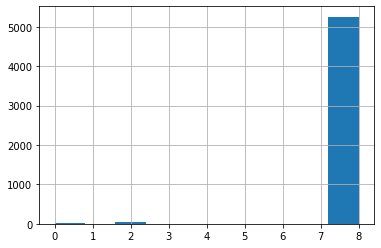

In [39]:
df_dominant_topic['Dominant_Topic'].hist(bins=10)


In [40]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_topics

,Num_Documents,Perc_Documents
8.0,5258,0.9896
2.0,47,0.0088
0.0,8,0.0015


<Axes: >

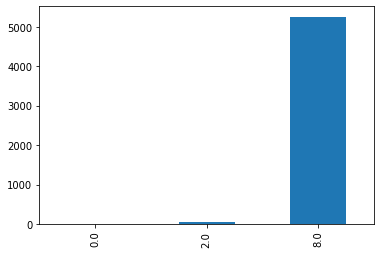

In [41]:
df_topics.sort_index().Num_Documents.plot.bar()


<Axes: >

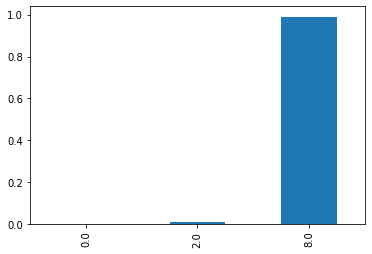

In [42]:
df_topics.sort_index().Perc_Documents.plot.bar()


In [43]:
tfidf = models.TfidfModel(corpus, smartirs='ntc')
tfidf_corpus=[]
for doc in tfidf[corpus]:
   tfidf_corpus.append([(id, np.around(freq,decimals=2)) for id, freq in doc])

lda_model2 = LdaModel(corpus=tfidf_corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -11.933006579690394


/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.9/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


In [45]:
lda_model2.print_topics()


[(0,
  '0.010*"sad" + 0.008*"buy" + 0.006*"club" + 0.001*"new_year" + 0.000*"funstarhumour" + 0.000*"smartcookie" + 0.000*"provisionistp" + 0.000*"bbcquestiontime_skynews" + 0.000*"doublehelix" + 0.000*"queer"'),
 (1,
  '0.030*"opinion" + 0.026*"new" + 0.025*"bad" + 0.022*"real" + 0.015*"voice" + 0.015*"open" + 0.011*"fuck" + 0.009*"life" + 0.009*"woman" + 0.007*"internet"'),
 (2,
  '0.012*"people" + 0.012*"fire" + 0.011*"think" + 0.011*"right" + 0.010*"s" + 0.009*"get" + 0.008*"m" + 0.007*"thing" + 0.007*"re" + 0.007*"make"'),
 (3,
  '0.041*"far" + 0.024*"guy" + 0.013*"quick" + 0.005*"read" + 0.004*"article" + 0.003*"podcast" + 0.003*"defend" + 0.003*"apply" + 0.002*"step" + 0.000*"freeforlife"'),
 (4,
  '0.016*"move" + 0.012*"little" + 0.010*"tweet" + 0.008*"wait" + 0.006*"thought" + 0.006*"late" + 0.005*"online" + 0.005*"ridiculous" + 0.004*"ill" + 0.003*"seriously"'),
 (5,
  '0.016*"block" + 0.016*"let" + 0.016*"big" + 0.014*"sure" + 0.013*"guess" + 0.012*"happy" + 0.011*"tell" + 0

In [46]:
vis2 = pyLDAvis.gensim.prepare(lda_model2, tfidf_corpus, id2word)
vis2

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.306013 -0.006415       1        1  48.517606
8     -0.052206 -0.215283       2        1  14.036182
9     -0.056356  0.077849       3        1  11.681656
5     -0.044850  0.043957       4        1   8.987562
7     -0.038879  0.029791       5        1   5.913299
1     -0.033830  0.024542       6        1   4.582218
6     -0.022334  0.013320       7        1   2.008938
4     -0.020181  0.011451       8        1   1.753117
3     -0.021375  0.012559       9        1   1.537877
0     -0.016001  0.008229      10        1   0.981545, topic_info=                         Term        Freq       Total Category  logprob  \
1                     culture  216.000000  216.000000  Default  30.0000   
0                      cancel  139.000000  139.000000  Default  29.0000   
404                      hate   69.000000   69.000000  Default  28.0000   
510                      wake   41.000000   41.000000  Default  27.0000   
357                       say   56.000000   56.000000  Default  26.0000   
...                       ...         ...         ...      ...      ...   
8666                    tvext    0.013508    0.838856  Topic10  -9.1933   
8848  bbcquestiontime_skynews    0.014417   26.946136  Topic10  -9.1282   
1827                      sht    0.013577    1.960255  Topic10  -9.1882   
707                   quickly    0.013464    1.375664  Topic10  -9.1966   
5347                     luck    0.013472    3.155456  Topic10  -9.1960   

      loglift  
1     30.0000  
0     29.0000  
404   28.0000  
510   27.0000  
357   26.0000  
...       ...  
8666   0.4951  
8848  -2.9094  
1827  -0.3486  
707   -0.0029  
5347  -0.8325  

[434 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1182      4  0.909511         able
127       6  0.977309   absolutely
1112      6  0.847547      account
471       6  0.670197  accountable
252       4  0.973888          act
...     ...       ...          ...
623       3  0.974144         word
544       1  0.981145         work
318       3  0.980397        wrong
721       1  0.980425         year
389       6  0.710028        young

[241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 10, 6, 8, 2, 7, 5, 4, 1])